In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

df = pd.read_csv('solar-pv-prices-vs-cumulative-capacity.csv')

max_year = df['Year'].max()

In [6]:
#Use logistic and Gompertz to predict solar pv cumulative capacity from 2023 to 2050

def logistic(t, L, K, T):
    return L / (1 + np.exp(-K * (t - T)))
def gompertz(t, L, K, T):
    return L * np.exp(-np.exp(-K * (t - T)))

x = df['Year'].values 
y = df['Solar photovoltaic cumulative capacity'].values

initial_L = max(y) 
initial_K = 1.0 
initial_T = x.mean()

popt_logistic, pcov = curve_fit(logistic, x, y, p0=[initial_L, initial_K, initial_T])
L_logistic, K_logistic, T_logistic = popt_logistic

popt_gompertz, pcov = curve_fit(gompertz, x, y, p0=[initial_L, initial_K, initial_T])
L_gompertz, K_gompertz, T_gompertz = popt_gompertz

future_years = np.arange(2023, 2051)

predicted_generation_logistic = logistic(future_years, L_logistic, K_logistic, T_logistic)
predicted_generation_gompertz = gompertz(future_years, L_gompertz, K_gompertz, T_gompertz)

predicted_data_logistic = pd.DataFrame({'Year': future_years, 'Cumulative capacity': predicted_generation_logistic})
predicted_data_gompertz = pd.DataFrame({'Year': future_years, 'Cumulative capacity': predicted_generation_gompertz})

print(predicted_data_logistic)
print(predicted_data_gompertz)

    Year  Cumulative capacity
0   2023         1.069531e+06
1   2024         1.165458e+06
2   2025         1.246064e+06
3   2026         1.311485e+06
4   2027         1.363102e+06
5   2028         1.402925e+06
6   2029         1.433123e+06
7   2030         1.455723e+06
8   2031         1.472470e+06
9   2032         1.484790e+06
10  2033         1.493805e+06
11  2034         1.500375e+06
12  2035         1.505149e+06
13  2036         1.508612e+06
14  2037         1.511119e+06
15  2038         1.512932e+06
16  2039         1.514243e+06
17  2040         1.515190e+06
18  2041         1.515873e+06
19  2042         1.516367e+06
20  2043         1.516723e+06
21  2044         1.516980e+06
22  2045         1.517165e+06
23  2046         1.517299e+06
24  2047         1.517395e+06
25  2048         1.517465e+06
26  2049         1.517515e+06
27  2050         1.517551e+06
    Year  Cumulative capacity
0   2023         1.159453e+06
1   2024         1.332668e+06
2   2025         1.515903e+06
3   2026  

In [11]:
# Experience curve theroy
# Using predicted future pv cumulative capacity data
# Calculating the future solar pv module price and learning rate 

import numpy as np

def calculate_module_future(capex_0, cuc_0, cuc_f, b):
    capex_f = capex_0 * (cuc_f / cuc_0) ** b
    return capex_f

capex_0 = df['Solar photovoltaic module price'].iloc[0] 
capex_p= df['Solar photovoltaic module price'].iloc[-1]
cuc_0 = df['Solar photovoltaic cumulative capacity'].iloc[0]
cuc_p = df['Solar photovoltaic cumulative capacity'].iloc[-1] 

LR = 1 - 10 ** (np.log10(capex_0 / capex_p) * np.log10(2) / np.log10(cuc_0 / cuc_p))
print('Learning Rate:', LR)

b = np.log(1-LR) / np.log(2)

future_years = np.arange(2023, 2051)
module_future_logistic = calculate_module_future(capex_0, cuc_0, predicted_generation_logistic, b)
module_future_gompertz = calculate_module_future(capex_0, cuc_0, predicted_generation_gompertz, b)

predicted_module_data_logistic = pd.DataFrame({'Year': future_years, 'Future Module_log': capex_future_logistic})
predicted_module_data_gompertz = pd.DataFrame({'Year': future_years, 'Future Module_gmp': capex_future_gompertz})

print(predicted_module_data_logistic)
print(predicted_module_data_gompertz)

Learning Rate: 0.25537332696181925
    Year  Future Module_log
0   2023           0.241561
1   2024           0.232894
2   2025           0.226361
3   2026           0.221487
4   2027           0.217880
5   2028           0.215227
6   2029           0.213286
7   2030           0.211871
8   2031           0.210842
9   2032           0.210096
10  2033           0.209556
11  2034           0.209165
12  2035           0.208883
13  2036           0.208678
14  2037           0.208531
15  2038           0.208425
16  2039           0.208348
17  2040           0.208293
18  2041           0.208253
19  2042           0.208224
20  2043           0.208203
21  2044           0.208188
22  2045           0.208177
23  2046           0.208169
24  2047           0.208164
25  2048           0.208160
26  2049           0.208157
27  2050           0.208155
    Year  Future Module_gmp
0   2023           0.233406
1   2024           0.219983
2   2025           0.208251
3   2026           0.197954
4   2027     

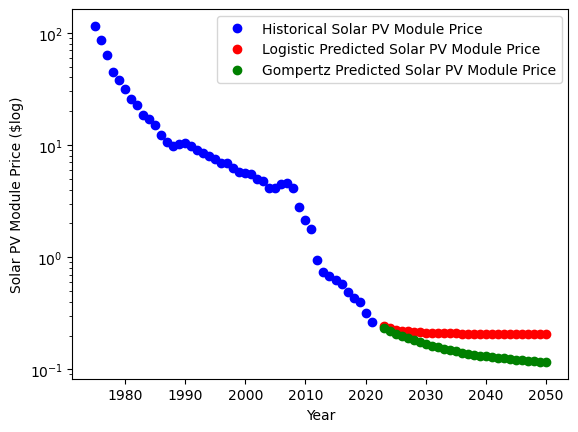

In [12]:
#Plot the graph

import matplotlib.pyplot as plt
plt.plot(df['Year'], df['Solar photovoltaic module price'], 'bo', label='Historical Solar PV Module Price')
plt.plot(predicted_capex_data_logistic['Year'], predicted_capex_data_logistic['Future CAPEX'], 'ro', label='Logistic Predicted Solar PV Module Price')
plt.plot(predicted_capex_data_gompertz['Year'], predicted_capex_data_gompertz['Future CAPEX'], 'go', label='Gompertz Predicted Solar PV Module Price')
plt.xlabel('Year')
plt.ylabel('Solar PV Module Price ($log)')
plt.yscale('log')
plt.legend()
plt.show()